<a href="https://colab.research.google.com/github/nuriaprol/UFV_Visualizacion/blob/main/EjerciciosClase/Clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.ufv.es/wp-content/uploads/2023/03/logo-UFV-scaled.jpg" alt="Logo de Colab" width="200">

# <font color='00008B'>Práctica de Python 1.</font>
##### Nuria Prol Vecoña
# <font color='00008B'>Ventas en Europa</font>
#####Visualización de Datos


---


In [115]:
!pip install plotly-express

In [116]:
from google.colab import files
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly_express as px


Librerías:
- matplotlib: para generar gráficos
- seaborn: para trabajar con paletas de colores.
- plotly_express: para crear gráficos interactivos

In [117]:
ventas = pd.read_csv("datos_ejercicio_ventas.csv")
ventas.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,396176.120491


Una vez tenemos la base de datos cargada comenzamos con el análisis de la misma.
Primero vemos lo que significa cada variable.
- **Country:** País donde se realizó la venta
- **Subrand:** Marca específica del producto
- **Year y Month:** El año y més para los cuales la predicción fue hecha
- **Scenario:** Indica si el dato es una predicción realizada por IA (AI_forecast) o un valor actual (actual).
- **Forecast**: Mes en que se realizó la predicción, donde cada etiqueta (AI_P02F, AI_P03F, etc.) corresponde a un mes específico (Enero, Febrero, etc.).
- **Forecast Year:** El año en que se realizó la predicción.
- **Amount**: Cantidad de venta o pronóstico en unidades monetarias.


##Preprocesamiento y Análisis de los datos


In [118]:
nan_por_columna = ventas.isna().sum()

total_nan = ventas.isna().sum().sum()

print("Valores NaN por columna:\n", nan_por_columna)
print("\nTotal de valores NaN en el DataFrame:", total_nan)


Valores NaN por columna:
 COUNTRY            0
SUBBRAND           0
YEAR               0
MONTH              0
SCENARIO           0
FORECAST         900
FORECAST_YEAR    900
AMOUNT             0
dtype: int64

Total de valores NaN en el DataFrame: 1800


Como los na están solo en las variables "Forecast" y "Forecast_Year" no es necesario eliminarlos, ya que estos datos solo se rellenan en el caso de que "SCENARIO" sea AI_forecast ya que se está tratando una predicción. Si "SCENARIO" es actual entonces en las variables Forecast y Forecast_year no habrá ningún valor.

### Duplicados

In [119]:
print("Número de registros antes de eliminar duplicados:", len(ventas))


duplicados = ventas.duplicated()
print("Número de registros duplicados:", duplicados.sum())

ventas = ventas.drop_duplicates()
print("Número de registros después de eliminar duplicados:", len(ventas))

Número de registros antes de eliminar duplicados: 18666
Número de registros duplicados: 663
Número de registros después de eliminar duplicados: 18003


###AI Forecast VS. Actual

Para seguir entendiendo nuestro dataset analizamos cuantos datos de los que hay en el dataset son predicciones y cuantos son valores actuales.
Esro lo haremos a través de un grafico de tarta para poder dimensionar a partir del 100% de nuestros datos cuantos son predicciones y cuantos valores actuales.

In [120]:
import plotly.express as px

# Contar el número de registros para cada tipo de "Scenario"
scenario_counts = ventas['SCENARIO'].value_counts()

fig = px.pie(
    names=scenario_counts.index,
    values=scenario_counts.values,
    title='Distribución de "actual" vs "AI_forecast"',
    color_discrete_sequence=['#ffad66', '#ff6f61'] #Dos tonos de naranja
)

# Personalizar el hover para mostrar solo el nombre y el valor
fig.update_traces(
    hovertemplate="<b>%{label}</b><br>%{value:,}"
)


fig.show()


Vemos con el gráfico que la gran mayoria de los datos de la base de datos son AI_Forecast

Ahora guardaremos en una variable aparte las filas de datos que contengan las ventas reales y no las predicciones para poder estudiarlas.

In [121]:
ventas_actual = ventas.copy()
ventas_actual = ventas_actual[ventas['SCENARIO'] == 'actual']
ventas_actual.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
277,Portugal,Pepsi Max (L3),2023,10,actual,NaN,NaN,1.885949e+05
278,Portugal,7up (L3),2023,3,actual,NaN,NaN,2.934971e+05
279,Portugal,7up (L3),2023,10,actual,NaN,NaN,3.484466e+05
280,Great Britain,7up Free (L3),2023,10,actual,NaN,NaN,1.172553e+06
281,Norway,Pepsi Regular (L3),2023,10,actual,NaN,NaN,3.784859e+04


In [122]:
ventas_forecast = ventas.copy()
ventas_forecast = ventas_forecast[ventas['SCENARIO'] == 'AI_forecast']
ventas_forecast.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,396176.120491


## Número de países y productos
### Productos:

In [123]:
#Nombre de los productos
num_products = ventas_actual['SUBBRAND'].unique()

print(f"Número de productos: {len(num_products)}")
print("Nombres de los Productos únicos:", num_products)

Número de productos: 6
Nombres de los Productos únicos: ['Pepsi Max (L3)' '7up (L3)' '7up Free (L3)' 'Pepsi Regular (L3)'
 'Lipton (L3)' 'Mountain Dew (L3)']


En la base de datos, se han identificado un total de seis productos únicos. Estos productos son: *Lipton (L3)*, *Pepsi Max (L3)*, *7up (L3)*, *Pepsi Regular (L3)*, *Mountain Dew (L3)* y *7up Free (L3)*. Estos representan las marcas específicas incluidas en las ventas analizadas.

Ahora, se realizará un gráfico de barras que nos permitirá visualizar y analizar la frecuencia de cada uno de estos productos dentro de los datos, proporcionando una visión clara de su distribución en el conjunto de ventas.

Se utiliza un gráfico de barras porque queremos mostrar la frecuencia de variables categóricas, donde el eje X mostrará las categorías y el eje Y la frecuencia.

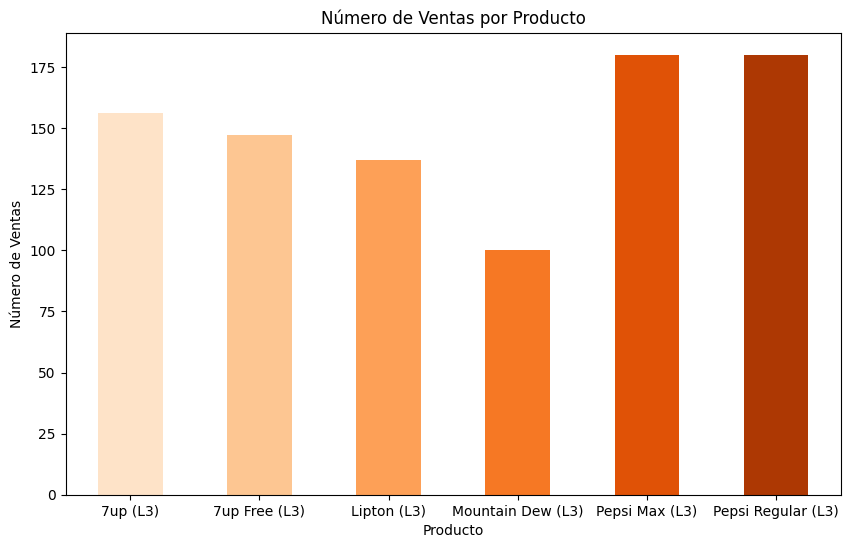

In [124]:
#Definimos una paleta de colores de color naranja, ya que estamos representando
#únicamente frecuencias
orange_palette = sns.color_palette("Oranges", 6)

#Gráfica con 10 unidades de 10 de ancho y 6 de alto
plt.figure(figsize=(10, 6))

#Agrupamos el dataset usando la columna subrand
ventas_actual.groupby('SUBBRAND').size().plot(kind='bar', color=orange_palette)

#Títulos en horizontal
plt.xticks(rotation=0)


plt.title("Número de Ventas por Producto")
plt.xlabel("Producto")
plt.ylabel("Número de Ventas")


plt.show()

Con el gráfico podemos ver que Pepsi Max (L3) y  Pepsi Regular (L3) son los productos con el mayor número de ventas.
Las marcas 7up (L3), 7up Free (L3) y Lipton (L3) tienen un volumen de ventas similar, mientras que Mountain Dew (L3) presenta la menor cantidad de ventas. Este análisis sugiere que las bebidas bajo la marca Pepsi dominan en ventas, destacándose sobre las otras marcas en el conjunto de datos.

###Países:

In [125]:
#Nombre de los países
num_countries = ventas['COUNTRY'].unique()

print(f"Número de países: {len(num_countries)}")
print("Nombres de los países únicos:", num_countries)

Número de países: 9
Nombres de los países únicos: ['Portugal' 'Great Britain' 'Spain' 'Hungary' 'Norway' 'Denmark'
 'Netherlands' 'Italy' 'Czech']


En la base de datos se identificaron un total de nueve países únicos donde se realizaron las ventas. Estos países son: *Portugal*, *Great Britain*, *Spain*, *Hungary*, *Norway*, *Denmark*, *Netherlands*, *Italy* y *Czech*. Cada país representa un mercado específico dentro del conjunto de datos.

Ahora, se utilizaremos un mapa de calor para analizar la concentración de ventas en cada país, lo que permitirá una visualización clara de la distribución geográfica de las ventas.

Se toma la decisión de realizar un mapa de calor para representar los datos porque estamos tratando con datos categóricos donde con el color podemos representar los países con mayores ventas ubicándolos gepgráficamente.

In [126]:
# Calcular la frecuencia de ventas por país y año para usar en el mapa


ventas_frecuencia = ventas.groupby(['COUNTRY', 'YEAR']).size().reset_index(name='FRECUENCIA_DE_VENTAS')

fig2 = px.choropleth(
    ventas_frecuencia,  #Los datos que nos interesa graficar
    locations="COUNTRY", #Los nombres de los países para identifcar cada region
    locationmode='country names', #Indicar que estamos tomando la variable
        #guardada en locations como nombres de países
    color="FRECUENCIA_DE_VENTAS", #La columna frecuencia de verntas va a ser
        #usada para definir el color
    hover_name="COUNTRY", #Muestra el nombre del país cuando pasas el cursor
        #sobre una región del mapa.
    animation_frame="YEAR", #Animación para ver como cambian las ventas por año
    color_continuous_scale=px.colors.sequential.Plasma,
    scope="europe"
)

fig2.show()


Observamos que los países con mayores frecuencias de ventas están coloreados en tonos amarillos y naranjas, mientras que aquellos con menos ventas están en tonos morados y azules.
Reino Unido es el país que mayores ventas muestra en el 2023 seguido de Países Bajos y por el otro lado Italia es el país que muestra menor ventas seguido de portugal.

###Productos por país:

Ahora vamos a estudiar la distribución de productos por país contando tanto ventas reales como predicciones.

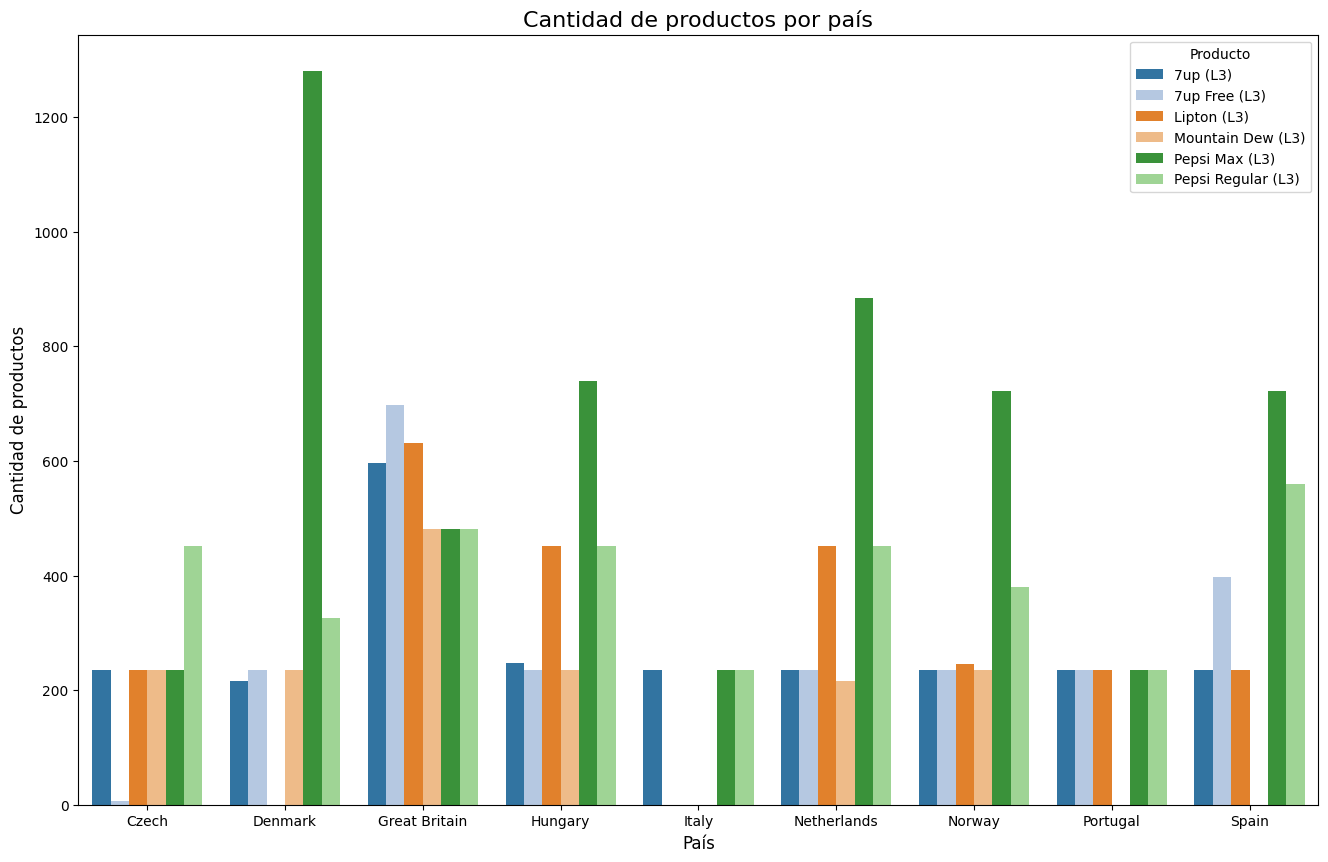

In [127]:
# Agrupamos por COUNTRY y SUBBRAND para contar las ocurrencias
productos_por_pais = ventas.groupby(['COUNTRY', 'SUBBRAND']).size().reset_index(name='count')

# Creamos el gráfico de barras
plt.figure(figsize=(16, 10))
sns.barplot(x='COUNTRY', y='count', hue='SUBBRAND', data=productos_por_pais, palette='tab20')


plt.title('Cantidad de productos por país', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Cantidad de productos', fontsize=12)
plt.legend(title='Producto')
plt.xticks(rotation=0)
plt.show()


Con este gráfico podemos ver la clara predominancia de las ventas de Pepsi Max frente a otros productos. Principalmente sus mayores ventas se encuentran en Dinamarca, Países Bajos y España, con esto podemos hacernos una idea del mercado en estos países.

Tambien podemos ver con este gráfico la diversidad de ventas por país, en países como Gran Bretaña, Paises Bajos y Noruega, los 6 productos fueron comprados cuando por el otro lado la venta de los productos se reduce a únicamente 3 en Italia.

Como habíamos visto previamente en la frecuencia de ventas Mountain Dew (L3) es el producto con menor ventas.

Otra conclusión que podemos obtener es que en países como Portugal e Italia, las ventas de ambos países se encuentran equilibaradas entre las distintas marcas.

###Ventas realizadas por mes de cada año

Para estudiar las ventas realizadas por cada mes del año, uniremos los datos para podeer estudiar si hay alguna tendencia.

In [128]:
ventas_actual['Fecha'] = pd.to_datetime(ventas_actual['YEAR'].astype(str) + '-' + ventas_actual['MONTH'].astype(str))

# Agrupamos  columna 'Fecha' y sumar 'AMOUNT'
ventas_agrupadas = ventas_actual.groupby('Fecha')['AMOUNT'].sum().reset_index()

# Crear el gráfico de líneas
fig = px.line(ventas_agrupadas, x='Fecha', y='AMOUNT',
              labels={'Fecha': 'Fecha', 'AMOUNT': 'Amount'},
              title='Ventas Totales por Mes y Año')


fig.update_traces(mode='lines+markers')  # Líneas con marcadores para cada punto
fig.update_xaxes(tickangle=45, dtick="M1", tickformat="%b\n%Y")
fig.update_layout(hovermode='x unified')
fig.show()

Con el gráfico de línea podemos ver como en los primeros meses del año las ventas tienden a bajar mientras que en los meses de verano son mayores las ventas.  

###AI Forecast VS. Actual

Para seguir entendiendo nuestro dataset analizamos cuantos datos de los que hay en el dataset son predicciones y cuantos son valores actuales.
Esro lo haremos a través de un grafico de tarta para poder dimensionar a partir del 100% de nuestros datos cuantos son predicciones y cuantos valores actuales.

In [129]:
# Contar el número de registros para cada tipo de "Scenario"
scenario_counts = ventas['SCENARIO'].value_counts()

fig = px.pie(
    names=scenario_counts.index,
    values=scenario_counts.values,
    title='Distribución de "actual" vs "AI_forecast"',
    color_discrete_sequence=['#ffad66', '#ff6f61'] #Dos tonos de naranja
)

fig.update_traces(
    hovertemplate="<b>%{label}</b><br>%{value:,}"
)


fig.show()


###Forecast
Sabemos que la variable Forecast representa el mes en que se realizó la predicción, donde cada etiqueta (AI_P02F, AI_P03F, etc.) corresponde a un mes específico (Enero, Febrero, etc.) Ahora analizaremos si en todos los meses se ha relizado una predicción.

In [130]:
#Nombre de los países
num_months = ventas['FORECAST'].unique()

print(f"Número de meses: {len(num_months)}")

Número de meses: 13


Tenemos 13 ya que cuenta los 12 meses más los datos que incluyen Nan que no tomaremos en cuenta.

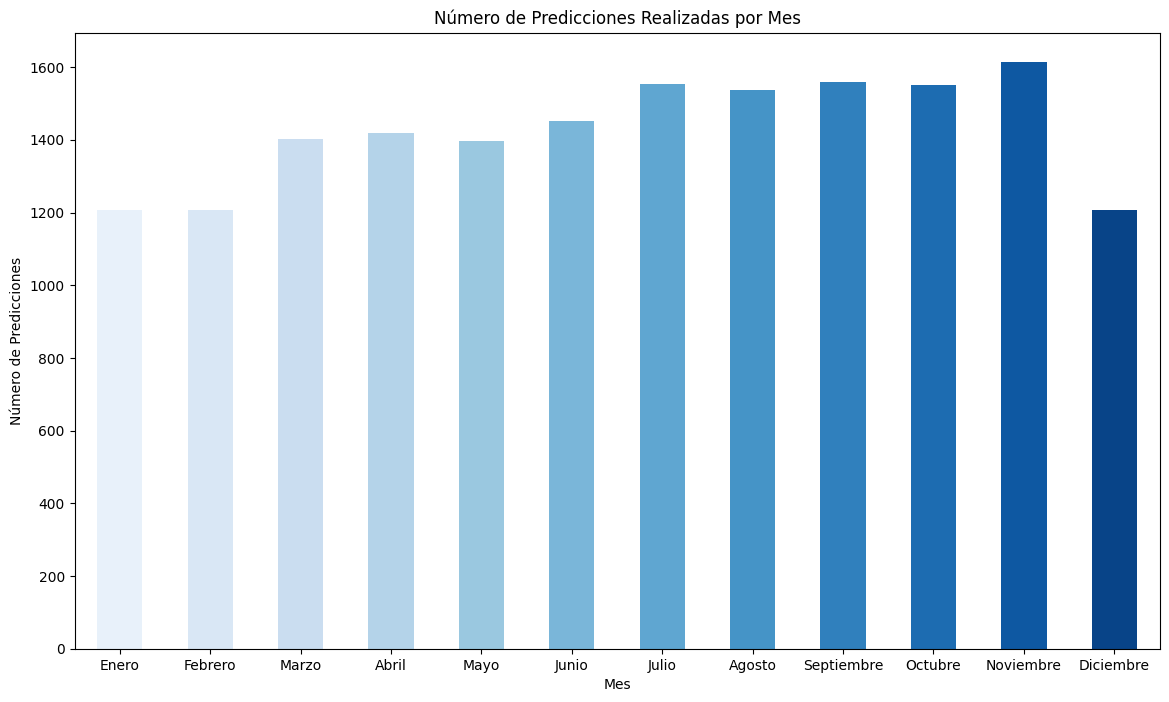

In [131]:
# Filtrar las predicciones y contar la cantidad realizada por mes
predicciones_por_mes = ventas[ventas['SCENARIO'] == 'AI_forecast']['FORECAST'].value_counts().sort_index()

# Mapeo de etiquetas de 'Forecast' a nombres de meses
meses = {
    'AI_P02F': 'Enero', 'AI_P03F': 'Febrero', 'AI_P04F': 'Marzo',
    'AI_P05F': 'Abril', 'AI_P06F': 'Mayo', 'AI_P07F': 'Junio',
    'AI_P08F': 'Julio', 'AI_P09F': 'Agosto', 'AI_P10F': 'Septiembre',
    'AI_P11F': 'Octubre', 'AI_P12F': 'Noviembre', 'AI_PF': 'Diciembre'
}

# Reemplazar las etiquetas por nombres de meses
predicciones_por_mes.index = predicciones_por_mes.index.map(meses)

# Ordenar por meses
predicciones_por_mes = predicciones_por_mes.reindex(meses.values())

blue_palette = sns.color_palette("Blues", len(predicciones_por_mes))

plt.figure(figsize=(14, 8))
predicciones_por_mes.plot(kind='bar', color=blue_palette)

plt.xticks(rotation=0)
plt.title("Número de Predicciones Realizadas por Mes")
plt.xlabel("Mes")
plt.ylabel("Número de Predicciones")

plt.show()

Podemos ver que las frecuencias de todos los meses es bastante parecida. Se puede destacar Noviembre con el mes con mayor frecuencia y Diciembre el mes con menos frecuencia.


##Histórico de predicciones de cada año



<ipython-input-132-659549725a87>:11: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.



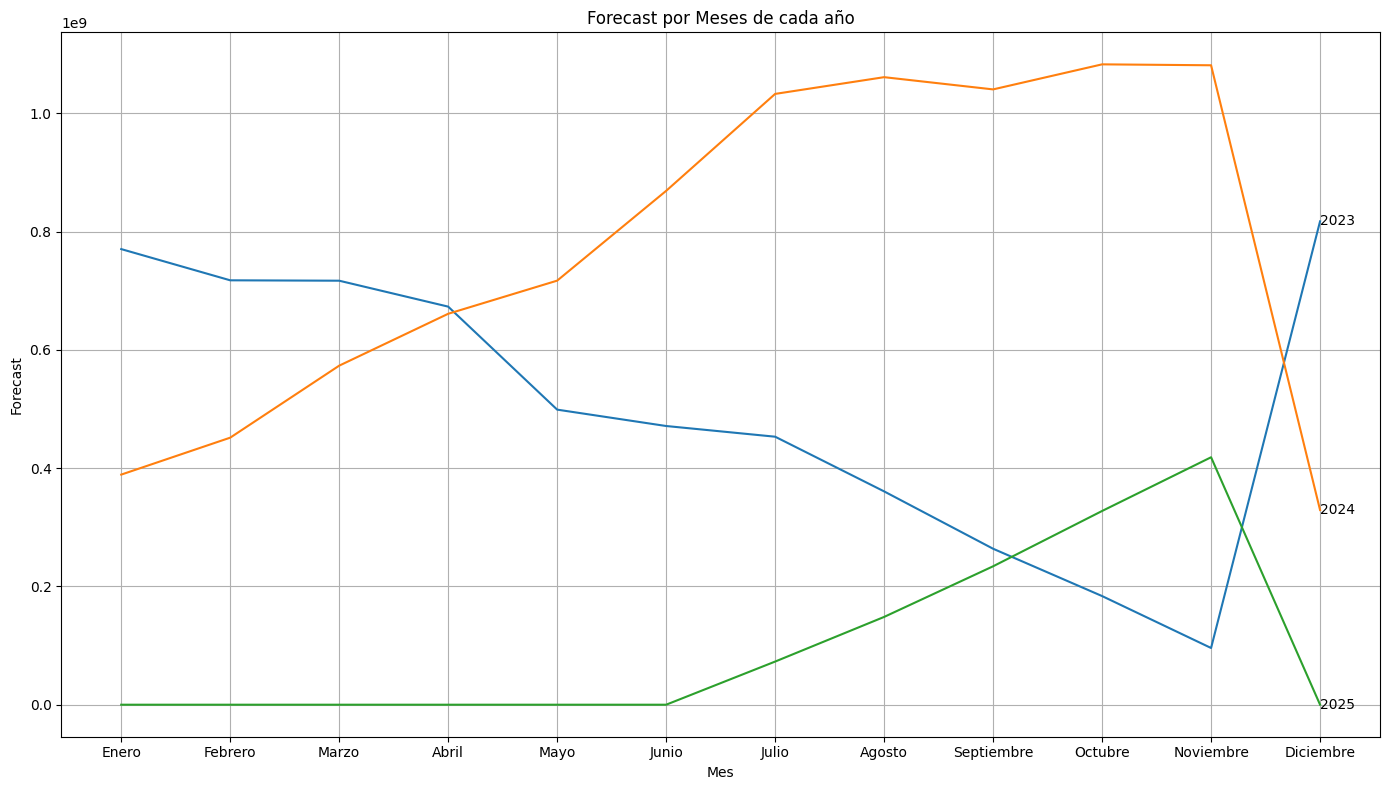

In [132]:
# Filtramos los datos y añadimos una nueva columna con el nombre del mes correspondiente
ventas['MONTH_NAME'] = ventas['FORECAST'].map(meses)
forecasts_data = ventas[ventas['SCENARIO'] == 'AI_forecast']

# Agrupamos y sumamos por mes y año, luego rellenamos valores faltantes
predicciones_por_mes = (forecasts_data.groupby(['MONTH_NAME', 'YEAR'])['AMOUNT']
                        .sum()
                        .unstack(fill_value=0))

all_months = pd.DataFrame(list(meses.values()), columns=['MONTH_NAME'])
predicciones_por_mes = all_months.set_index('MONTH_NAME').join(predicciones_por_mes,
                                                               how='left')

fig, ax = plt.subplots(figsize=(14, 8))
for year in predicciones_por_mes.columns:
    ax.plot(predicciones_por_mes.index, predicciones_por_mes[year], label=str(year))
    # Colocamos el año al final de cada línea
    ax.text(x=predicciones_por_mes.index[-1], y=predicciones_por_mes[year].iloc[-1],
            s=str(year), va='center')

ax.set_title('Forecast por Meses de cada año')
ax.set_xlabel('Mes')
ax.set_ylabel('Forecast')
plt.xticks(rotation=0)
plt.grid(visible=True)
plt.tight_layout()
plt.show()

Existe una variabilidad considerable en los pronósticos entre los años. Cada línea de color representa un año diferente, mostrando la tendencia del pronóstico de ventas. En este gráfico se usan colores distintos para cada línea porque las líneas se van a cruzar.


2023: Muestra una tendencia generalmente descendente a lo largo del año, excepto por una pronunciada subida hacia el final del año (Noviembre muy bajo y en Diciembre subió).
2024: Comienza con pronósticos bajos, aumenta significativamente hasta Noviembre, pero luego muestra una caída abrupta en Diciembre.
2025: Los datos parecen incompletos pero indican una gran volatilidad, con un pico (Noviembre) seguido de una caída.

# Horizonte de Previsión

In [138]:
import pandas as pd

horizonte = ventas[ (ventas['COUNTRY'] == 'Portugal') & (ventas['SUBBRAND'] == 'Lipton (L3)') & (ventas['FORECAST'] == 'AI_P02F') ].shape[0]
horizonte1 = ventas[ (ventas['COUNTRY'] == 'Denmark') & (ventas['SUBBRAND'] == 'Pepsi Max (L3)') & (ventas['FORECAST'] == 'AI_P02F')].shape[0]
print(horizonte)
print(horizonte1)

18
36


El horizonte de previsón representa cómo se espera que se comporten las ventas del producto durante los próximos 18 meses o en múltiplos de 18. Con un horizonte de previsión de 18 meses, una empresa puede ajustar sus niveles de producción para asegurarse de que no habrá excesos ni faltantes significativos de producto.

##Tendencia y Estacionalidad
###Todas las ventas del país con menos ventas

Para esto volvemos a estudiar las ventas por país pero tomando en cuenta unicamente las ventas reales.


In [134]:
ventas_frecuencia = ventas_actual.groupby(['COUNTRY', 'YEAR']).size().reset_index(name='FRECUENCIA_DE_VENTAS')

fig2 = px.choropleth(
    ventas_frecuencia,
    locations="COUNTRY",
    locationmode='country names',
    color="FRECUENCIA_DE_VENTAS",
    hover_name="COUNTRY",
    animation_frame="YEAR",
    color_continuous_scale=px.colors.sequential.Plasma,
    scope="europe"
)

fig2.show()

En ambos años el país con menores ventas es Italia, seguido de Dinamarca.

In [135]:
#Incluismos solo los datos de Italia y Dinamarca
ventas_actualpaises = ventas_actual[ventas_actual['COUNTRY'].isin(['Italy', 'Denmark'])]

ventas_actualpaises['Fecha'] = pd.to_datetime(ventas_actualpaises['YEAR'].astype(str) + '-' + ventas_actualpaises['MONTH'].astype(str))

ventas_agrupadas = ventas_actualpaises.groupby(['COUNTRY', 'Fecha'])['AMOUNT'].sum().reset_index()

fig = go.Figure()

for country in ventas_agrupadas['COUNTRY'].unique():
    country_data = ventas_agrupadas[ventas_agrupadas['COUNTRY'] == country]
    fig.add_trace(go.Scatter(x=country_data['Fecha'], y=country_data['AMOUNT'],
                             mode='lines+markers', name=country,
                             text=[country] * len(country_data),
                             hoverinfo='text+x+y'))

    #texto al final de la línea
    fig.add_annotation(x=country_data['Fecha'].iloc[-1], y=country_data['AMOUNT'].iloc[-1],
                       text=country, showarrow=False, yshift=10)

fig.update_xaxes(tickangle=0, dtick="M1", tickformat="%b\n%Y")

fig.update_layout(title='Comparación de Ventas Totales por Mes y Año entre Italia y Dinamarca',
                  xaxis_title='Fecha',
                  yaxis_title='Monto de Ventas',
                  hovermode='x unified',
                  showlegend=False)

# Mostrar el gráfico
fig.show()


<ipython-input-135-f3509d8dee89>:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-135-f3509d8dee89>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Con este gráfico de líneas podemos estudiar tanto la tendencia como la estacionalidad de ambos países con el menor número de ventas.

**Tendencia**
Ambos países muestran tendencias fluctuantes pero al compararlas podemos ver que la de Italia es un poco más estable.
Ambas tienen un pico en las ventas de Marzo del 2023, las ventas de ambos países se alzaron en este mes. Tienen también ventas elevadas hacia el final del año 2024 en Noviembre específicamente.

Aunque ambs muestran un patrçn similar la principal diferencia ocurre en Junio del 2024, donde las venras de Dinamarca tuvieron una gran caída mientras que las de Italia se mantuvieron relativamente constantes.


**Estacionalidad**

Las ventas en Italia durante el 2023 muestran que en verano als ventas subieron y a medida que terminaba el evrano y se acercaba otoño las ventas bajarob, teniendo un baja pronunciada en octubre; pero este patrón no se repite en el siguiente año, en 2024 bno se encuentra un patrón significativo, las ventas se mantienen rekativamente estables de enero a agosto.

Un patrón que se puede encontrar en Dinamarca es que los puntos más bajos ocurren en Enero de ambos años. Al comenzar el año las ventas bajas significativamente pero en Marzo de ambos años ya muestran ventas altas, incluso más altas que las ventas en Italia. También durante ambos años, en Abrl ocurre el mismo número de ventas.

In [136]:
#Incluismos solo los datos de Pepsi Max y Regular
ventas_actualmarcas = ventas_actual[ventas_actual['SUBBRAND'].isin(['Pepsi Max (L3)', 'Pepsi Regular (L3)'])]

ventas_actualmarcas['Fecha'] = pd.to_datetime(ventas_actualmarcas['YEAR'].astype(str) + '-' + ventas_actualmarcas['MONTH'].astype(str))

ventas_agrupadas = ventas_actualmarcas.groupby(['SUBBRAND', 'Fecha'])['AMOUNT'].mean().reset_index()

fig = go.Figure()

for country in ventas_agrupadas['SUBBRAND'].unique():
    country_data = ventas_agrupadas[ventas_agrupadas['SUBBRAND'] == country]
    fig.add_trace(go.Scatter(x=country_data['Fecha'], y=country_data['AMOUNT'],
                             mode='lines+markers', name=country,
                             text=[country] * len(country_data),
                             hoverinfo='text+x+y'))

    fig.add_annotation(x=country_data['Fecha'].iloc[-1], y=country_data['AMOUNT'].iloc[-1],
                       text=country, showarrow=False, yshift=10)

fig.update_xaxes(tickangle=0, dtick="M1", tickformat="%b\n%Y")

fig.update_layout(title='Comparación de Ventas Totales por Mes y Año entre Pepsi Max y Regular',
                  xaxis_title='Fecha',
                  yaxis_title='Amount',
                  hovermode='x unified',
                  showlegend=False)
fig.show()

<ipython-input-136-2a20cc1d23aa>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Ambas tendencias se muestran relativamente estables, en el caso de Pepsi Max hay un pico significativo en Enero de 2024 emparejandose con Enero y Febrero de2023, estos meses son los que presentan ventas más bajas  mientrs que Mayo de ambos años y Diciembre del 2023 muestran los valores mñas altos.

En el casi de Pepsi Regular, las ventas desde Enero de 2023 a Agosto de 2024 se encuentran entre los 5 y 10 Millones, por lo que se considera una tendencia estable, no hay ni picos ni bajadas.


En cuanto a la estacionalidad en Pepsi Max podemos ver como las ventas más altas ocurren cada 6 meses aproximadamente, Mayo y Diciembre son los que muestran más altos y también podemos ver cierto ciclo de que en enero las ventas bajan, lo que nos puede ayudar a predecir que ocurrirá en Enero de 2025.  

##Predicciones España


In [137]:
import plotly.graph_objects as go

ventas_españa_forecast = ventas[(ventas['COUNTRY'] == 'Spain') & (ventas['SCENARIO'] == 'AI_forecast')]
ventas_españa_forecast['Fecha'] = pd.to_datetime(ventas_españa_forecast['YEAR'].astype(str) + '-' + ventas_españa_forecast['MONTH'].astype(str))


ventas_españa_actual = ventas[(ventas['COUNTRY'] == 'Spain') & (ventas['SCENARIO'] == 'actual')]
ventas_españa_actual['Fecha'] = pd.to_datetime(ventas_españa_actual['YEAR'].astype(str) + '-' + ventas_españa_actual['MONTH'].astype(str))

# Agrupar por fecha y calcular el promedio para AI_forecast
ventas_promedio = ventas_españa_forecast.groupby('Fecha')['AMOUNT'].mean().reset_index()

ventas_actual = ventas_españa_actual.groupby('Fecha')['AMOUNT'].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x=ventas_promedio['Fecha'], y=ventas_promedio['AMOUNT'],
                         mode='lines+markers', name='Promedio de ventas pronosticadas',
                         hoverinfo='text+x+y'))

# Añadir datos actuales al gráfico
fig.add_trace(go.Scatter(x=ventas_actual['Fecha'], y=ventas_actual['AMOUNT'],
                         mode='lines+markers', name='Ventas Actuales',
                         hoverinfo='text+x+y'))

fig.update_xaxes(tickangle=0, dtick="M1", tickformat="%b\n%Y")

fig.update_layout(title='Comparación de Ventas Actuales y Promedio de Ventas Pronosticadas por Mes en España',
                  xaxis_title='Fecha',
                  yaxis_title='Monto de Ventas',
                  hovermode='x unified',
                  showlegend=True)

fig.show()

<ipython-input-137-ae7d9bf34130>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-137-ae7d9bf34130>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Las predicciones son efectivas, ya que se alinean bien con los datos actuales de los meses para los cuales tenemos información. Además, para los meses futuros sin datos actuales, las predicciones muestran un comportamiento plausible, destacando ventas elevadas en agosto, similar a lo observado en los dos años anteriores, y valores más bajos para los meses de enero y febrero, consistentes con lo registrado en 2023 y 2024. Por lo tanto, considero que estas son predicciones acertadas.